All information needed will be added in this code, each code has a markdown on top of it for an explanation

Some libraries are added

In [161]:
from bs4 import BeautifulSoup as bs

import os, glob

import shutil
from IPython.utils.io import capture_output
import random

#from my_simulation import simulacion  



First we add the activities of the mision, and the probability of success

Go ahead and select option for a random collection of activities or use the example given (modify if like, the code will still work)


In [162]:
#use the word "manual" or "random"
mision_activities="random"

#probability from 0 to 1
fixed_prob="probability=0.3;"

#number of times the mision is repeated to be stored in one log
repetition_numer=1

#duration of the simulation in seconds
timer=30000


Here we define the activities, this function will be called, if you selected a "manual" choice of the activities, here you can modify it

In [163]:
 

def activities(prob_sucess):
    if mision_activities=="manual":   
        ################################ ADD THE ACTIVITIES #######################################################     #delete previos content
        file="/home/jazmin/tuttifrutti/log/Tesis/mision_variables/activities.txt"
        f = open(file, "w")
        f.close()
        f = open(file, "a")
        f.write(prob_sucess)
        f.write("\n") 
        f.write("activities[\"0_sec\"] = {21,22,23};")
        f.write("\n") 
        f.write("activities[\"1_con\"] = {31,25,26};")
        f.close()

            ################################ ADD THE ACTIVITIES #######################################################

    if mision_activities=="random":

        sum_total = 0
        dictionary_lists = {}

        list_counter = 0
        initial_word = random.choice(["con\"", "sec\""])
        previous_word = initial_word

        while sum_total != 20:
            random_number = random.randint(1, 20)
            if sum_total + random_number <= 20:
                sum_total += random_number
            else:
                continue

            if previous_word == "con\"":
                current_word = "sec\""
            else:
                current_word = "con\""

            key = f"\"{list_counter}_{current_word}"
            
            # Generate unique random numbers for each lista
            random_numbers = set()
            while len(random_numbers) < max(2, random_number):
                new_number = random.randint(1, 60)
                random_numbers.add(new_number)
            
            dictionary_lists[key] = list(random_numbers)
            list_counter += 1
            previous_word = current_word


        print("Total sum:", sum_total)
        print("Dictionary of lists:")

        file="/home/jazmin/tuttifrutti/log/Tesis/mision_variables/activities.txt"
        f = open(file, "w")
        f.close()
        f = open(file, "a")
        f.write(prob_sucess)
        
        for key, lista in dictionary_lists.items():
            print(f'{key}: {lista}')  
            lista_str = ', '.join(map(str, lista))
            f.write("\n") 
            f.write("activities[" + key + "] = {" + lista_str + "};")
        f.close()



execute the mision, you can change variable n_repetition 

Next line is executed when option manual is used, change the folder path to your needs


you can change the number of repetitions of the mision.

In [164]:

activities("probability=1;")
#!python /home/jazmin/tuttifrutti/log/Tesis/Codigos/seed_change_multiple_times.py "/home/jazmin/tuttifrutti/log/Tesis/EventLogs/" --repetition $repetition_numer  --time $timer

Total sum: 20
Dictionary of lists:
"0_sec": [1, 3, 5, 7, 14, 17, 18, 19, 20, 23, 24, 29, 31, 32, 38, 40, 44, 47, 49, 58]


In [61]:
activities(fixed_prob)
!python /home/jazmin/tuttifrutti/log/Tesis/Codigos/seed_change_multiple_times.py "/home/jazmin/tuttifrutti/log/Tesis/EventLogs_fail/" --repetition $repetition_numer  --time $timer


Total sum: 20
Dictionary of lists:
"0_sec": [35, 17]
"1_con": [24, 38, 34, 49, 29, 46, 50, 20, 24, 17, 3, 58, 1]
"2_con": [59, 10]
"3_con": [29, 7, 29]


Simulación aqui.
[  4%] Automatic MOC for target argos3_demiurge_loop_functions
[  4%] Built target argos3_demiurge_loop_functions_autogen
[ 16%] Built target argos3_demiurge_loop_functions
[ 20%] Automatic MOC for target tutti_tmt_loopfunc
[ 20%] Built target tutti_tmt_loopfunc_autogen
Scanning dependencies of target tutti_tmt_loopfunc
[ 25%] Building CXX object loop-functions/moca/CMakeFiles/tutti_tmt_loopfunc.dir/TuttiTmTLoopFunc.cpp.o
In file included from /home/jazmin/tuttifrutti/experiments-loop-functions/loop-functions/moca/TuttiTmTLoopFunc.cpp:11:
/home/jazmin/tuttifrutti/experiments-loop-functions/loop-functions/moca/TuttiTmTLoopFunc.h:96:5: warning: "/*" within comment [-Wcomment]
   96 |     /*
      |      
/home/jazmin/tuttifrutti/experiments-loop-functions/loop-functions/moca/TuttiTmTLoopFunc.cpp: In member function ‘virtual void TuttiTmTLoopFunction::Init(argos::TConfigurationNode&)’:
/home/jazmin/tuttifrutti/experiments-loop-functions/loop-functions/moca/TuttiTmTLoopFun

Store all information for the mision in one folder

1. Create new folder

In [62]:
# Directory where you want to search for folders
directory = "/home/jazmin/tuttifrutti/log/Tesis/"

# Prefix that should be in the folder names
prefix = "example"

# Find all folders with the "example" prefix in the name
folders = [name for name in os.listdir(directory) if prefix in name]

# Find the highest number in the folder names
numbers = [int(name.replace(prefix, "")) for name in folders]
highest_number = max(numbers) if numbers else 0

# Create the name for the new folder
new_name = f"{prefix}{highest_number + 1}"

# Full path of the new folder
new_folder = os.path.join(directory, new_name)

Code to copy folder into the new folder

In [63]:
def copy_folder(source, destination):
    try:
        # Create the new folder if it doesn't exist
        if not os.path.exists(destination):
            os.mkdir(destination)
        # Use the `copytree` function from shutil to copy the folder and its contents
        shutil.copytree(source, os.path.join(destination, os.path.basename(source)))
        print(f"Folder '{os.path.basename(source)}' copied to {destination}")
    except Exception as e:
        print(f"Unable to copy the folder: {e}")

Code to copy a file into a new folder

In [64]:
def copy_file(source, destination):
    try:
        # Use the `copy` function from shutil to copy the file
        shutil.copy(source, destination)
        print(f"File copied from {source} to {destination}")
    except Exception as e:
        print(f"Unable to copy the file: {e}")


Files to copy

In [65]:
event_log = "/home/jazmin/tuttifrutti/log/Tesis/EventLogs"
event_log_fail ="/home/jazmin/tuttifrutti/log/Tesis/EventLogs_fail"
variables="/home/jazmin/tuttifrutti/log/Tesis/mision_variables/activities.txt"

copy_folder(event_log, new_folder)
copy_folder(event_log_fail, new_folder)
copy_file(variables, new_folder)

Folder 'EventLogs' copied to /home/jazmin/tuttifrutti/log/Tesis/example8
Folder 'EventLogs_fail' copied to /home/jazmin/tuttifrutti/log/Tesis/example8
File copied from /home/jazmin/tuttifrutti/log/Tesis/mision_variables/activities.txt to /home/jazmin/tuttifrutti/log/Tesis/example8


Next line is executed when option random is used, change the folder path to your needs

Rest of the time, executed from here

In [66]:
import matplotlib.pyplot as plot
import pandas as pd
import numpy as np
import glob
import os
import seaborn as sns
from datetime import date
from IPython.display import Markdown, display
import matplotlib.pyplot as plt
import pm4py
from pm4py.objects.conversion.log import converter as log_converter
from pm4py.visualization.petri_net import visualizer as pn_visualizer
from pm4py.objects.petri_net.utils.decomposition import decompose
from pm4py.objects.petri_net.utils import reachability_graph
from pm4py.visualization.transition_system import visualizer as ts_visualizer

Create one dataframe with the info from all EventLogs

In [67]:

def concatenate(folder):
    filenames = glob.glob(folder + "/*.csv")
    dfs = []
    model=0
    for filename in filenames:
        log = pd.read_csv(filename, sep=',')
        case_id=[]
        case_id += len(log.mision) * ["mision "+str(model)]
        log['mision']=case_id
        model+=1
        dfs.append(log)
        big_frame = pd.concat(dfs, ignore_index=True)
        if model==len(filenames):
            big_frame.to_csv('/home/jazmin/tuttifrutti/log/Tesis/LogFinal/final_log_2.csv', sep=',', index=False)


Set the names for the colums in both dataframes

In [68]:
fn = '/home/jazmin/tuttifrutti/log/Tesis/LogFinal/final_log_2.csv'
concatenate(new_folder+"/EventLogs")
events = pd.read_csv(fn)
events.columns = ['mision', 'action', 'datetime', 'resource', 'random_seed']
events['datetime'] = pd.to_datetime(events['datetime'])
events


mision     action            datetime resource  random_seed
0      mision 0  T_21_Busy 2023-09-16 16:54:48       17           27
1      mision 0  T_21_Done 2023-09-16 16:54:53       17           27
2      mision 0  T_22_Busy 2023-09-16 16:55:34       11           27
3      mision 0  T_22_Done 2023-09-16 16:55:39       11           27
4      mision 0  T_23_Busy 2023-09-16 16:56:07        5           27
...         ...        ...                 ...      ...          ...
1339  mision 49  T_25_Busy 2023-09-16 16:56:04        4           16
1340  mision 49  T_26_Busy 2023-09-16 16:56:04       13           16
1341  mision 49  T_31_Done 2023-09-16 16:57:56       10           16
1342  mision 49  T_25_Done 2023-09-16 16:57:56        4           16
1343  mision 49  T_26_Done 2023-09-16 16:57:56       13           16

[1344 rows x 5 columns]

In [69]:

concatenate(new_folder+"/EventLogs_fail")
events_fail = pd.read_csv(fn)
events_fail.columns = ['mision', 'action', 'datetime', 'resource', 'random_seed']
events_fail['datetime'] = pd.to_datetime(events_fail['datetime'])
events_fail

mision          action            datetime resource  random_seed
0      mision 0       T_21_Busy 2023-09-16 17:21:34       10           50
1      mision 0  T_21_rebooting 2023-09-16 17:21:42       10           50
2      mision 0        time_out 2023-09-16 17:33:45     user           50
3      mision 0        time_out 2023-09-16 17:33:45     user           50
4      mision 0        time_out 2023-09-16 17:33:46     user           50
...         ...             ...                 ...      ...          ...
1340  mision 49    T_25_waiting 2023-09-16 17:29:53        4           50
1341  mision 49        time_out 2023-09-16 17:30:30     user           50
1342  mision 49        time_out 2023-09-16 17:30:30     user           50
1343  mision 49        time_out 2023-09-16 17:30:31     user           50
1344  mision 49        time_out 2023-09-16 17:30:31     user           50

[1345 rows x 5 columns]

To use pm4py first we convert to an EventLog

In [70]:
events.rename(columns={'datetime': 'time:timestamp', 'mision': 'case:concept:name', 'action': 'concept:name', 'random_seed': 'org:resource'}, inplace=True)
events_fail.rename(columns={'datetime': 'time:timestamp', 'mision': 'case:concept:name', 'action': 'concept:name', 'random_seed': 'org:resource'}, inplace=True)

## Convert to log format the events without fail probability
log_inicial = log_converter.apply(events)
## Convert to log format the events with fail probability
log_fail = log_converter.apply(events_fail)


For the ideal log, we don't need much information, just to make sure is perfect

We check for the variants

In [71]:
variants = pm4py.get_variants(log_fail)
len(variants)
variants

/home/jazmin/.local/lib/python3.8/site-packages/pm4py/utils.py:494: UserWarning: the EventLog class has been deprecated and will be removed in a future release.
  warnings.warn("the EventLog class has been deprecated and will be removed in a future release.")


{('T_21_Busy',
  'T_21_rebooting',
  'time_out',
  'time_out',
  'time_out',
  'time_out'): [{'attributes': {'concept:name': 'mision 0'}, 'events': [{'concept:name': 'T_21_Busy', 'time:timestamp': Timestamp('2023-09-16 17:21:34'), 'resource': '10', 'org:resource': 50}, '..', {'concept:name': 'time_out', 'time:timestamp': Timestamp('2023-09-16 17:33:46'), 'resource': 'user', 'org:resource': 50}]}],
 ('T_21_Busy',
  'T_21_rebooting',
  'T_21_Busy',
  'T_21_rebooting',
  'T_21_Busy',
  'T_21_rebooting',
  'T_21_Busy',
  'T_21_rebooting',
  'T_21_Busy',
  'T_21_rebooting',
  'T_21_Busy',
  'T_21_rebooting',
  'T_21_Busy',
  'T_21_rebooting',
  'T_21_Busy',
  'T_21_rebooting',
  'T_21_Busy',
  'T_21_rebooting',
  'T_21_Busy',
  'T_21_rebooting',
  'time_out',
  'time_out',
  'time_out',
  'time_out'): [{'attributes': {'concept:name': 'mision 1'}, 'events': [{'concept:name': 'T_21_Busy', 'time:timestamp': Timestamp('2023-09-16 17:18:52'), 'resource': '5', 'org:resource': 50}, '..', {'concept

There should be as many as number of (concurrent activities x number of actions on the activities) the mision has, if there's more, substrac them.

In [72]:
k=3
log = pm4py.filter_variants_top_k(log_inicial, k)


In [73]:
#log_no_timeout = pm4py.filter_activities_rework(log_inicial, "time_out", 1)
log_no_timeout = pm4py.filter_event_attribute_values(log_inicial, "concept:name", ["time_out"], level="case", retain=False)
log_no_timeout

[{'attributes': {'concept:name': 'mision 8'}, 'events': [{'concept:name': 'T_21_Busy', 'time:timestamp': Timestamp('2023-09-16 16:49:57'), 'resource': '16', 'org:resource': 13}, '..', {'concept:name': 'T_26_Done', 'time:timestamp': Timestamp('2023-09-16 16:55:45'), 'resource': '16', 'org:resource': 13}]}, '....', {'attributes': {'concept:name': 'mision 49'}, 'events': [{'concept:name': 'T_21_Busy', 'time:timestamp': Timestamp('2023-09-16 16:50:41'), 'resource': '15', 'org:resource': 16}, '..', {'concept:name': 'T_26_Done', 'time:timestamp': Timestamp('2023-09-16 16:57:56'), 'resource': '13', 'org:resource': 16}]}]

We can get the model using different algorithims, we'll use 4: alpha miner, inductive miner, heuristic miner, lip miner

Alpha miner

In [74]:
net, im, fm = pm4py.discover_petri_net_alpha(log_no_timeout)

parameters = {pn_visualizer.Variants.FREQUENCY.value.Parameters.FORMAT: "png"}
gviz = pn_visualizer.apply(net, im, fm , parameters=parameters, variant=pn_visualizer.Variants.FREQUENCY, log=log_no_timeout)
pn_visualizer.save(gviz, new_folder+"/Alpha_miner_frequency_IDEAL.png")
#pm4py.view_petri_net(net, im, fm)

replaying log with TBR, completed variants ::   0%|          | 0/10 [00:00<?, ?it/s]

Heuristic miner

In [75]:
#Petri net
net, im, fm = pm4py.discover_petri_net_heuristics(log_no_timeout, dependency_threshold=0.99)
parameters = {pn_visualizer.Variants.FREQUENCY.value.Parameters.FORMAT: "png"}
gviz = pn_visualizer.apply(net, im, fm , parameters=parameters, variant=pn_visualizer.Variants.FREQUENCY, log=log_no_timeout)
pn_visualizer.save(gviz, new_folder+"/Heuristic_miner_frequency_IDEAL.png")
#pm4py.view_petri_net(net, im, fm)

replaying log with TBR, completed variants ::   0%|          | 0/10 [00:00<?, ?it/s]

ILP miner

In [76]:
net, im, fm = pm4py.discovery.discover_petri_net_ilp(log_inicial)
parameters = {pn_visualizer.Variants.FREQUENCY.value.Parameters.FORMAT: "png"}
gviz = pn_visualizer.apply(net, im, fm, parameters=parameters, variant=pn_visualizer.Variants.FREQUENCY, log=log_inicial)
pn_visualizer.save(gviz, new_folder+"/ILP_miner_frequency_IDEAL.png")
#pm4py.view_petri_net(net, im, fm)

discovering Petri net using ILP miner, completed causal relations ::   0%|          | 0/43 [00:00<?, ?it/s]

replaying log with TBR, completed variants ::   0%|          | 0/47 [00:00<?, ?it/s]

Inductivo miner

We'll use inductive miner at the end beause we'll use it for conformance checking and like this variables as net, initial_marking, final_marking are saved

replaying log with TBR, completed variants ::   0%|          | 0/47 [00:00<?, ?it/s]

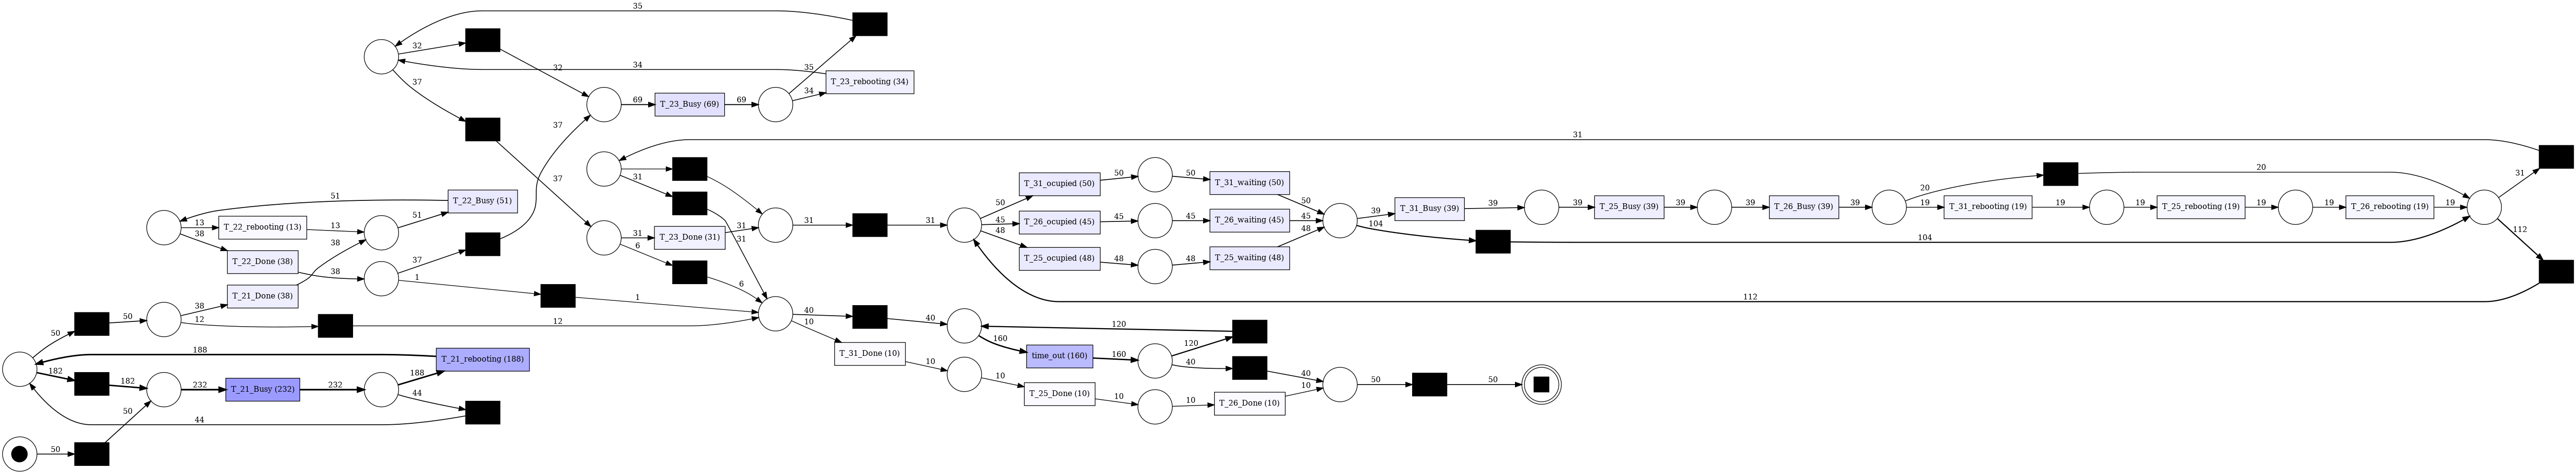

In [77]:
net, initial_marking, final_marking = pm4py.discover_petri_net_inductive(log_inicial)

#we can add frequency and performance, change the word to FREQUENCY or PERFORMANCE accordingly
parameters = {pn_visualizer.Variants.FREQUENCY.value.Parameters.FORMAT: "png"}
gviz = pn_visualizer.apply(net, initial_marking, final_marking, parameters=parameters, variant=pn_visualizer.Variants.FREQUENCY, log=log_inicial)
pn_visualizer.save(gviz, new_folder+"/Inductive_miner_frequency_IDEAL.png")
pn_visualizer.view(gviz)

replaying log with TBR, completed variants ::   0%|          | 0/10 [00:00<?, ?it/s]

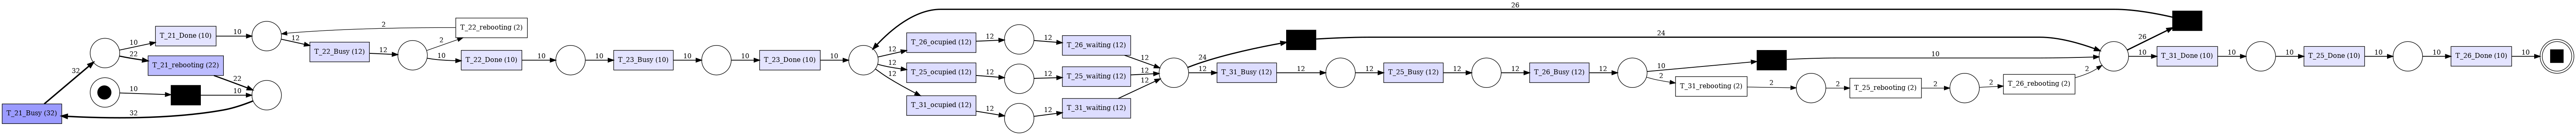

In [78]:
net, initial_marking, final_marking = pm4py.discover_petri_net_inductive(log_no_timeout)

#we can add frequency and performance, change the word to FREQUENCY or PERFORMANCE accordingly
parameters = {pn_visualizer.Variants.PERFORMANCE.value.Parameters.FORMAT: "png"}
gviz = pn_visualizer.apply(net, initial_marking, final_marking, parameters=parameters, variant=pn_visualizer.Variants.FREQUENCY, log=log_no_timeout)
pn_visualizer.save(gviz, new_folder+"/Inductive_miner_frequency_IDEAL_not_time_out.png")
pn_visualizer.view(gviz)

Now that we have an IDEAL model of the operation, we'll get some variables for the real proccess

REAL LOG

To only get activities that happen fast from 0 to 200 seconds only

In [79]:

filtered_log = pm4py.filter_case_performance(log_fail, 0, 100)
filtered_log

[]

Let's check the number of varians, the activities involved (with its frequency) and the resource (with its frequency)


Note: the resource can be exchange between robot and random_seed, to do so go back to the log converter and change the name of the resource


In [80]:
variants = pm4py.get_variants(log_fail)
activities = pm4py.get_event_attribute_values(log_fail, "concept:name")
resources = pm4py.get_event_attribute_values(log_fail, "org:resource")
len(variants)
activities

{'T_21_Busy': 221,
 'T_21_rebooting': 179,
 'time_out': 160,
 'T_21_Done': 38,
 'T_22_Busy': 64,
 'T_22_rebooting': 26,
 'T_22_Done': 35,
 'T_23_Busy': 71,
 'T_23_Done': 31,
 'T_25_ocupied': 49,
 'T_25_waiting': 49,
 'T_26_ocupied': 49,
 'T_26_waiting': 49,
 'T_31_ocupied': 48,
 'T_31_waiting': 48,
 'T_31_Busy': 35,
 'T_25_Busy': 35,
 'T_26_Busy': 35,
 'T_31_rebooting': 19,
 'T_25_rebooting': 19,
 'T_26_rebooting': 19,
 'T_31_Done': 10,
 'T_25_Done': 10,
 'T_26_Done': 10,
 'T_23_rebooting': 36}

If the probability of failure is too high you may enconter filtering the log to only the most k used variables useful

In [81]:
k=len(variants)
log_variantes = pm4py.filter_variants_top_k(log_fail, k)

Now, lets say you you want to filter your log only on a especific attribute.
You can do it by case meaning all the cases that have that attribute, or by event by filtering only the events containing the attribute

In [82]:
#You can get all the events containing a attribute
tracefilter_log_event = pm4py.filter_event_attribute_values(log_fail, "org:resource", [7], level="event", retain=False)
#Or all the cases containing a attribute
tracefilter_log_case = pm4py.filter_event_attribute_values(log_fail, "org:resource", [7], level="case", retain=False)


Now if we want to check for cases were two activities are follow by one anohter we use this filter, if you can check for example how many times an activity rebooted when x activity happend first, yo can do it here

In [83]:
Log_between = pm4py.filter_between(log_fail, "T_0_Busy", "T_0_rebooting")
len(filtered_log)

0

To eliminate noise, we can eliminte logs that are too long (rework) or too short (incompleate)

In [84]:
log_by_size = pm4py.filter_case_size(log_fail, 0, 9)
filtered_log

[]

To check for activities being excecuted more than k time we use

In [85]:
k=3
filtered_log = pm4py.filter_activities_rework(log_fail, 'T_0_rebooting', k)
print(filtered_log)

[]


To check for paths that take too long we use paths performance, so we get the list of paths taking longer than expected

In [86]:
filtered_log = pm4py.filter_paths_performance(log_fail, ("T_0_Done", "T_2_Busy"), 0, 200)
filtered_log

[]

We can also model the REAL log, we'll use the same 4 algorithms, but we'll only save the inductive, since it works better and this models won't be used in conformance checking tecniches

ALPHA MINER
As we will see it has a tough time handeling the concurrent activities 

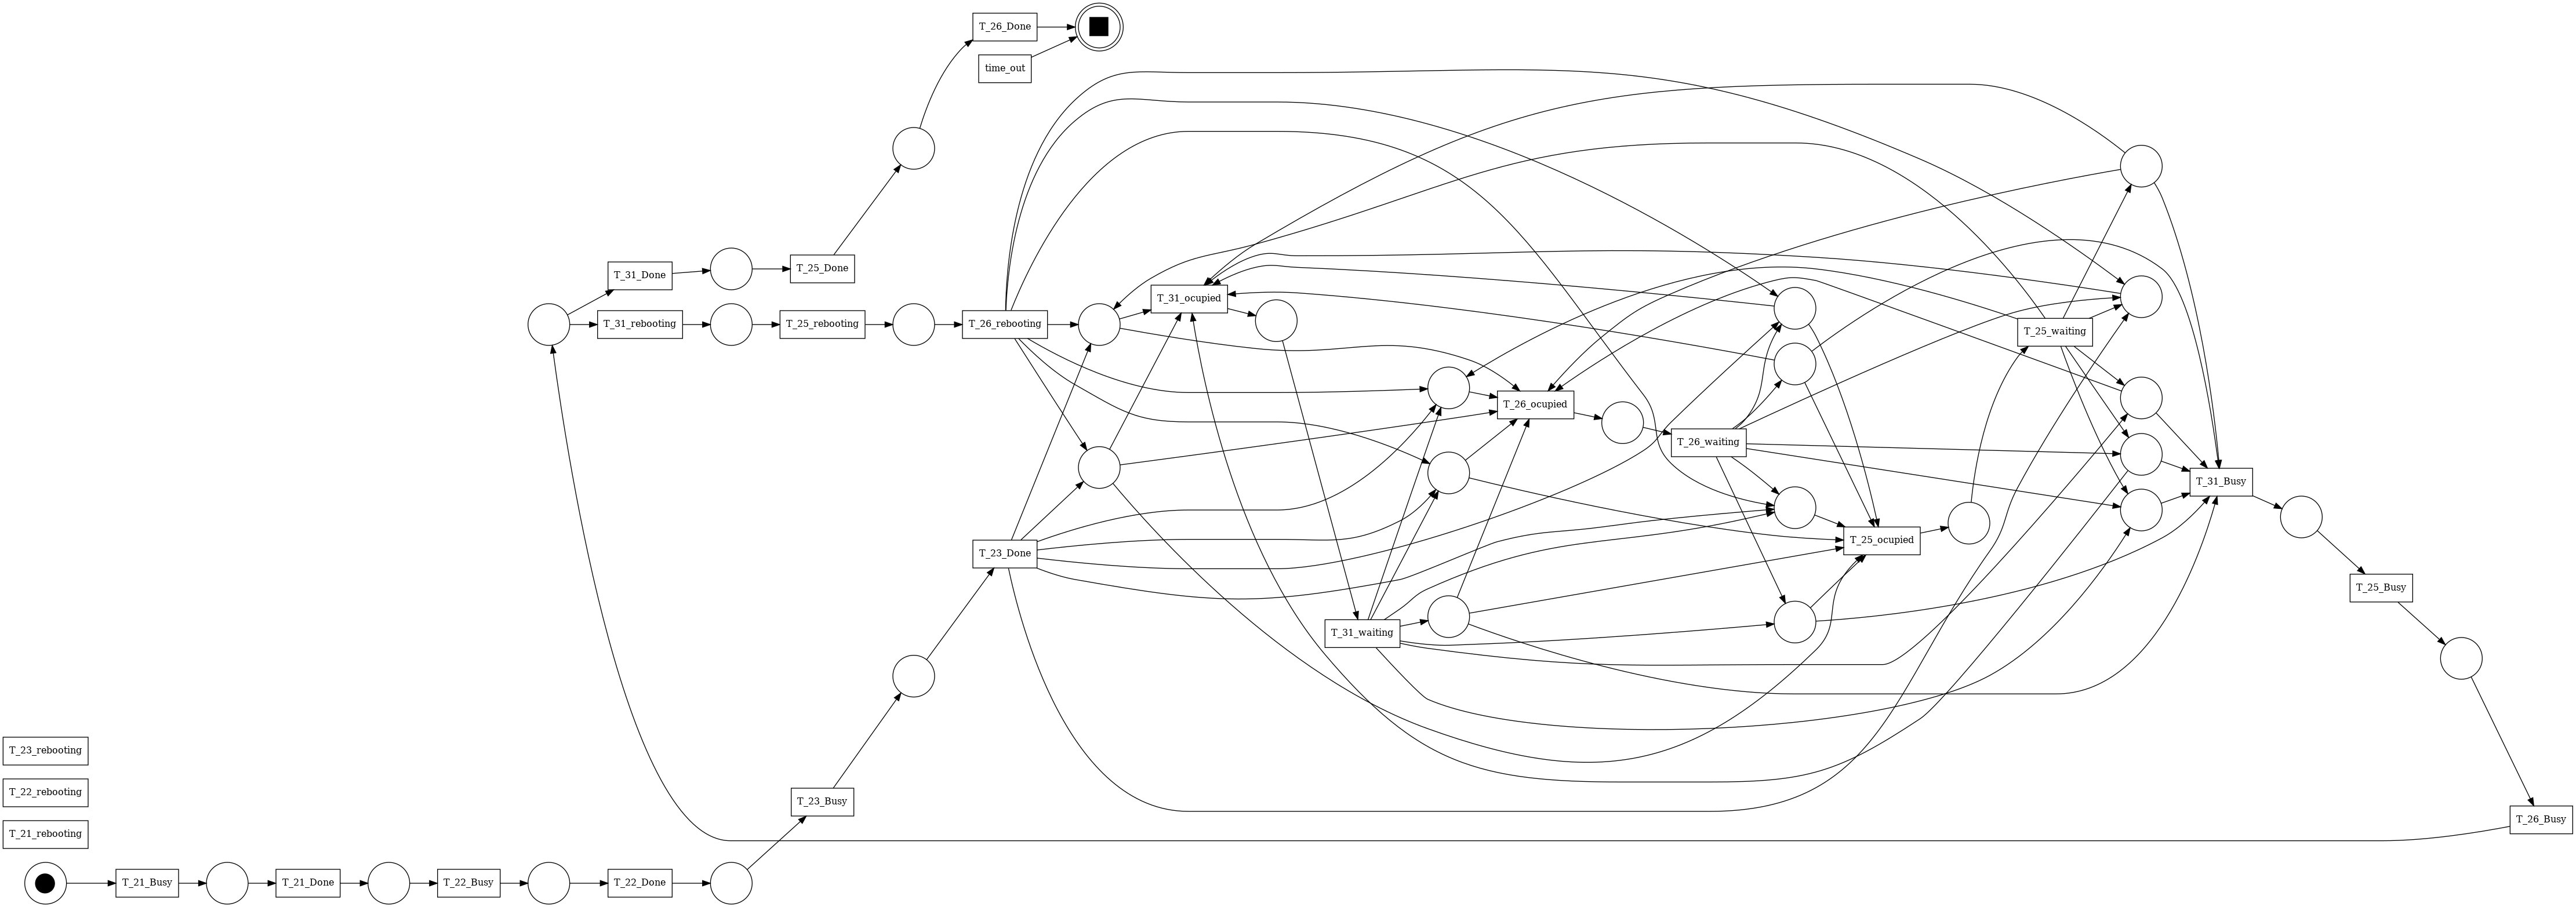

In [87]:
net_f, initial_marking_f, final_marking_f = pm4py.discover_petri_net_alpha(log_fail)

pm4py.view_petri_net(net_f, initial_marking_f, final_marking_f)


INDUCTIVE MINER

This algorithim can be seen as a petri net, as a process tree and as a bpmn model.
According to the state of the art literature this alg should be the best at handeling the behaviour of a group of robots

replaying log with TBR, completed variants ::   0%|          | 0/47 [00:00<?, ?it/s]

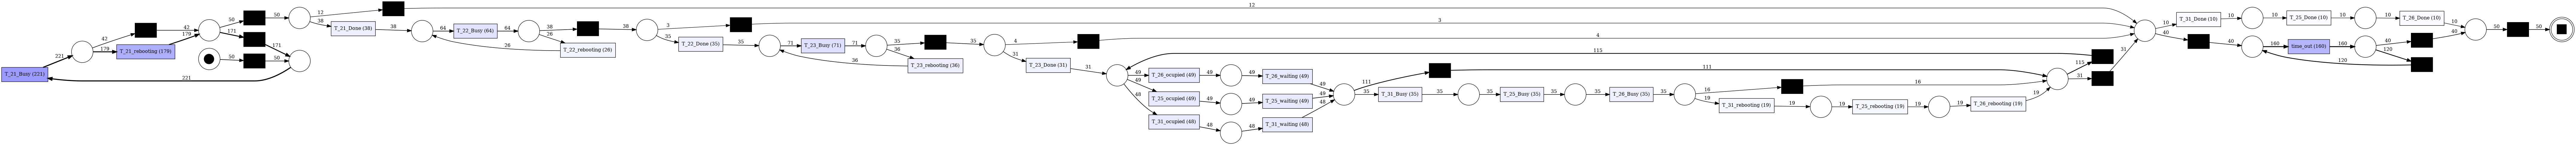

In [88]:
net_f, initial_marking_f, final_marking_f = pm4py.discover_petri_net_inductive(log_fail)

#we can add frequency and performance, change the word to FREQUENCY or PERFORMANCE accordingly
parameters = {pn_visualizer.Variants.PERFORMANCE.value.Parameters.FORMAT: "png"}
gviz = pn_visualizer.apply(net_f, initial_marking_f, final_marking_f, variant=pn_visualizer.Variants.FREQUENCY, log=log_fail)
pn_visualizer.view(gviz)
pn_visualizer.save(gviz, new_folder+"/Inductive_miner_frequency_REAL.png")


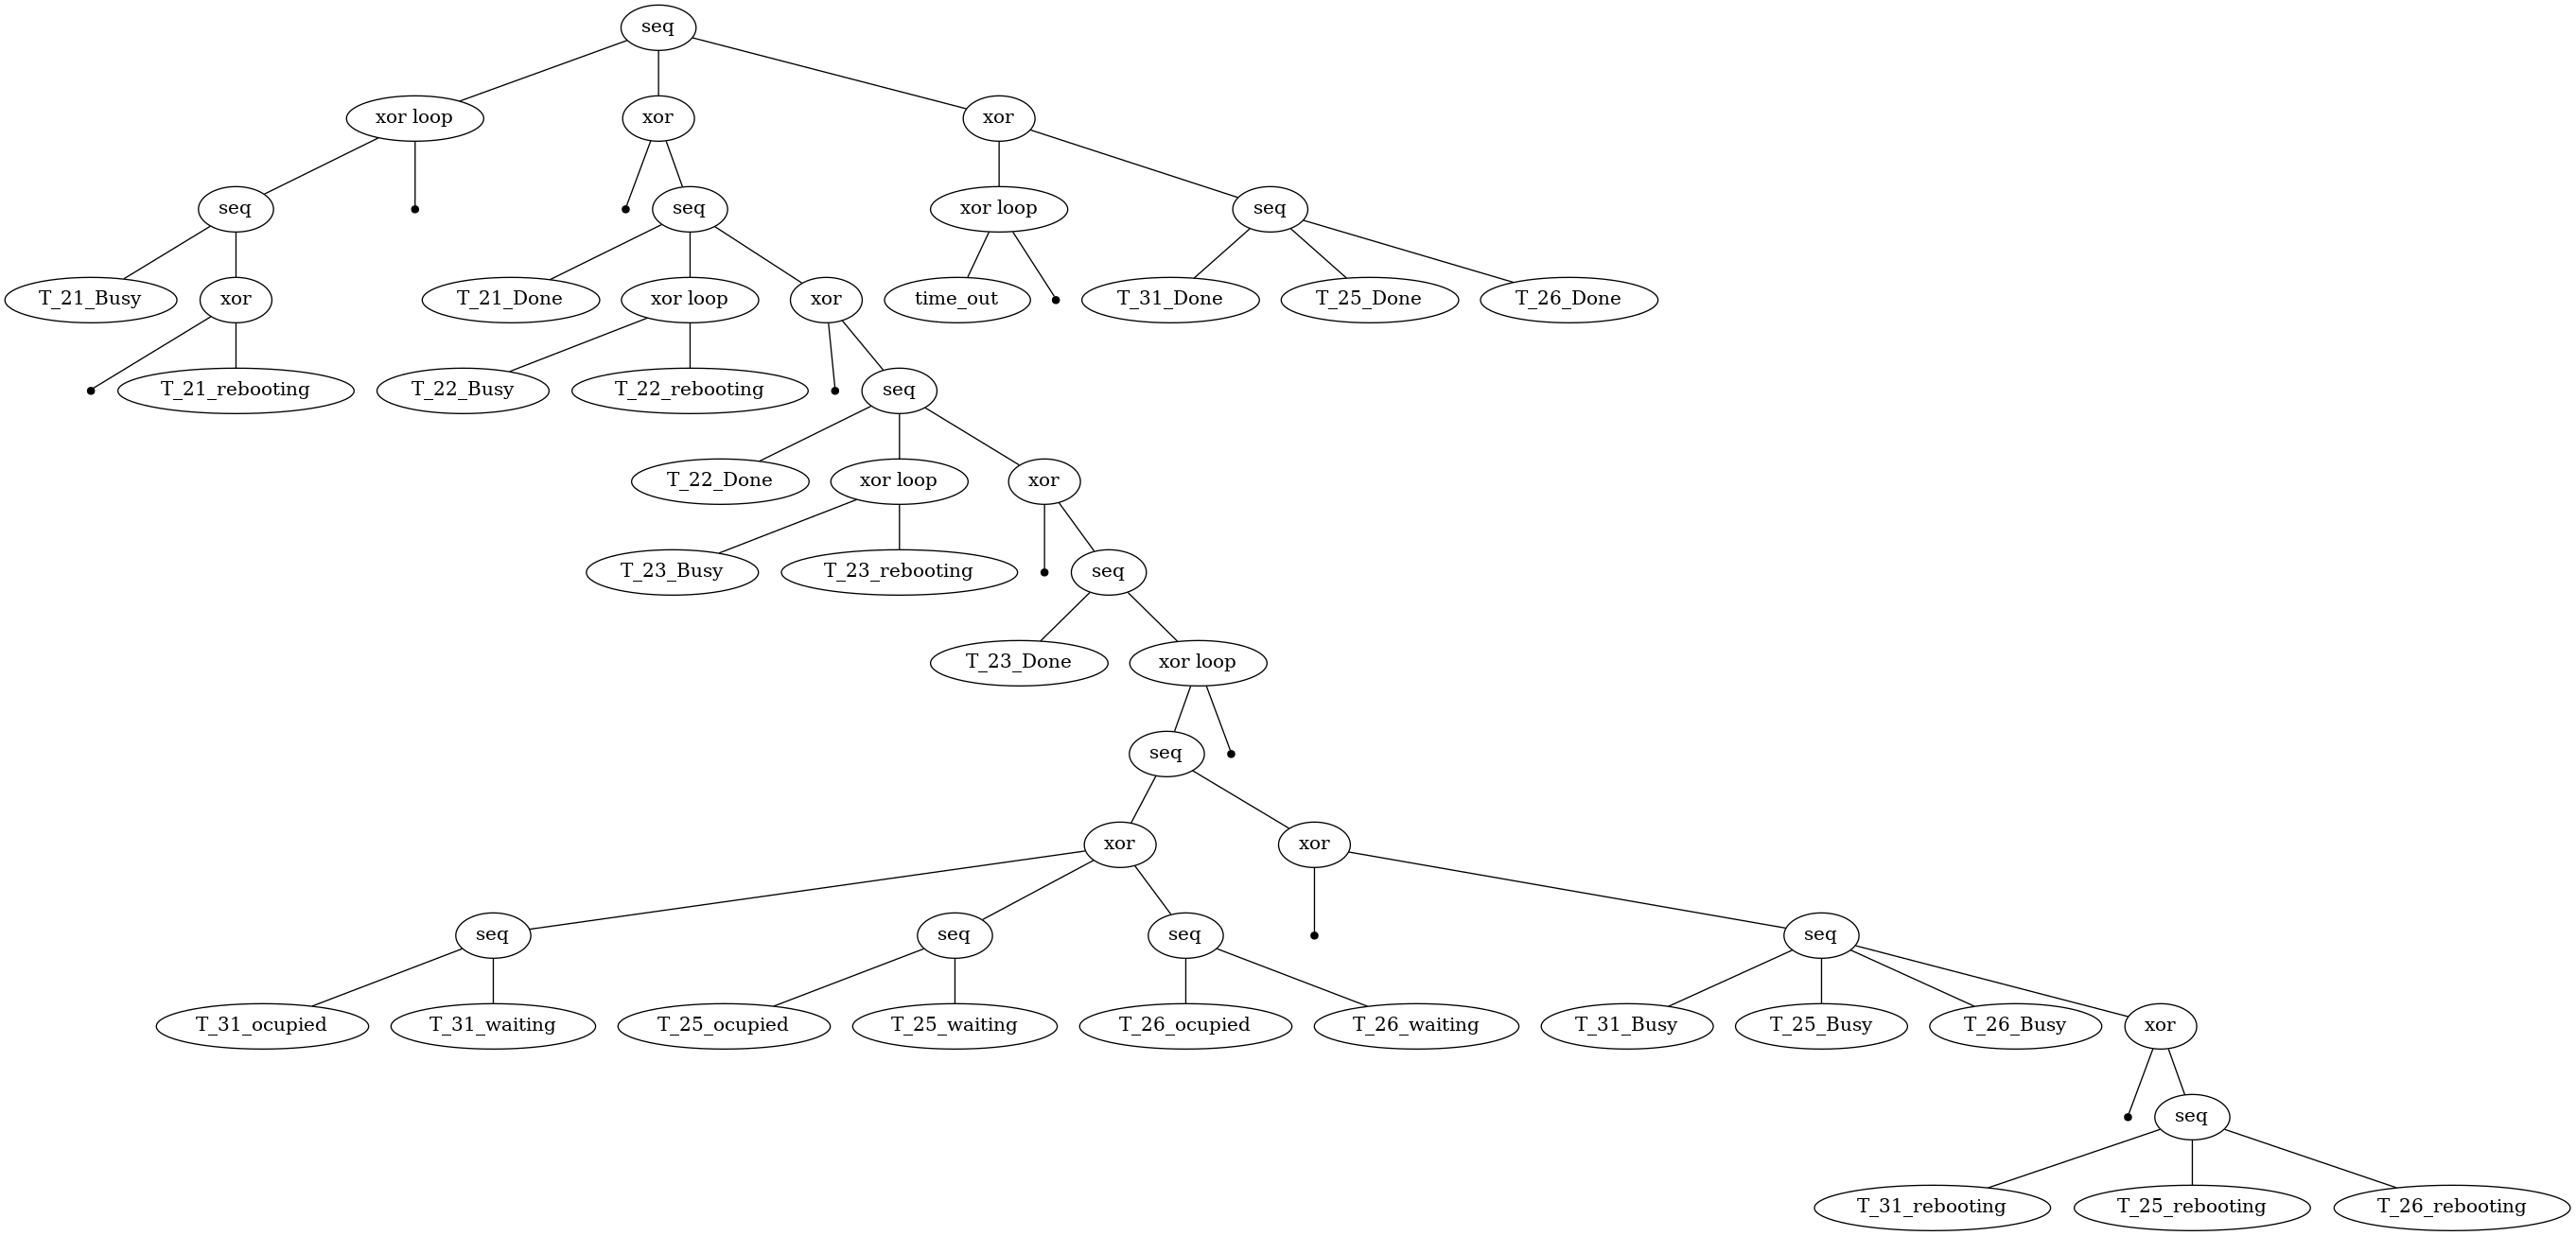

In [89]:
tree = pm4py.discover_process_tree_inductive(log_fail)
pm4py.view_process_tree(tree)


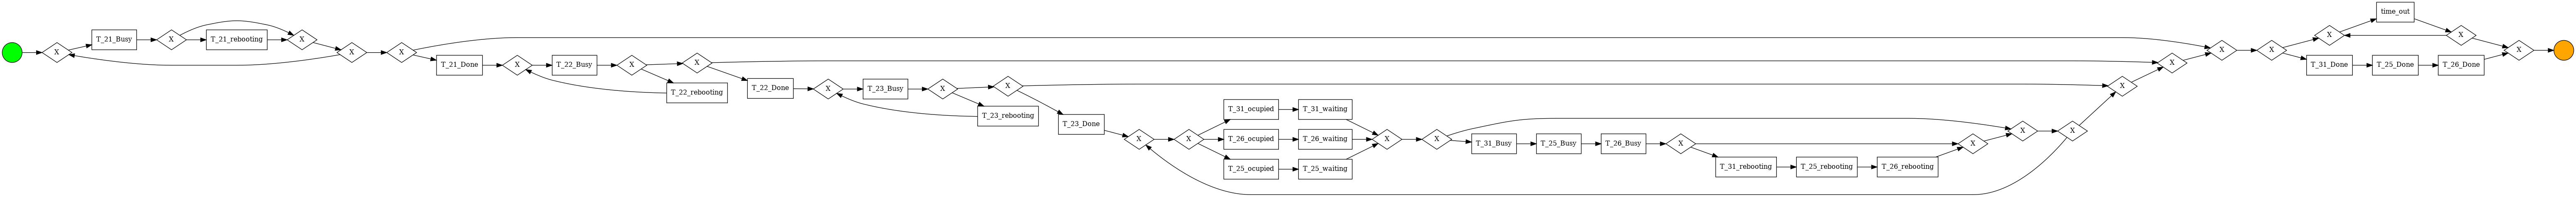

In [90]:
bpmn_graph = pm4py.discover_bpmn_inductive(log_fail)
pm4py.view_bpmn(bpmn_graph)


    HEURISTIC MINER

    Heuristics Miner is an algorithm that acts on the Directly-Follows Graph, providing way to handle with noise and to find common constructs (dependency between two activities, AND).

    We will obtain a Heuristic net and a Petri Net

In [91]:
#Heuristic net
heu_net = pm4py.discover_heuristics_net(log_fail, dependency_threshold=0.99)
#pm4py.view_heuristics_net(heu_net)

In [92]:
#Petri net
net_f, initial_marking_f, final_marking_f= pm4py.discover_petri_net_heuristics(log_fail, dependency_threshold=0.99)
#pm4py.view_petri_net(net_f, initial_marking_f, final_marking_f)

ILP MINER

discovering Petri net using ILP miner, completed causal relations ::   0%|          | 0/43 [00:00<?, ?it/s]

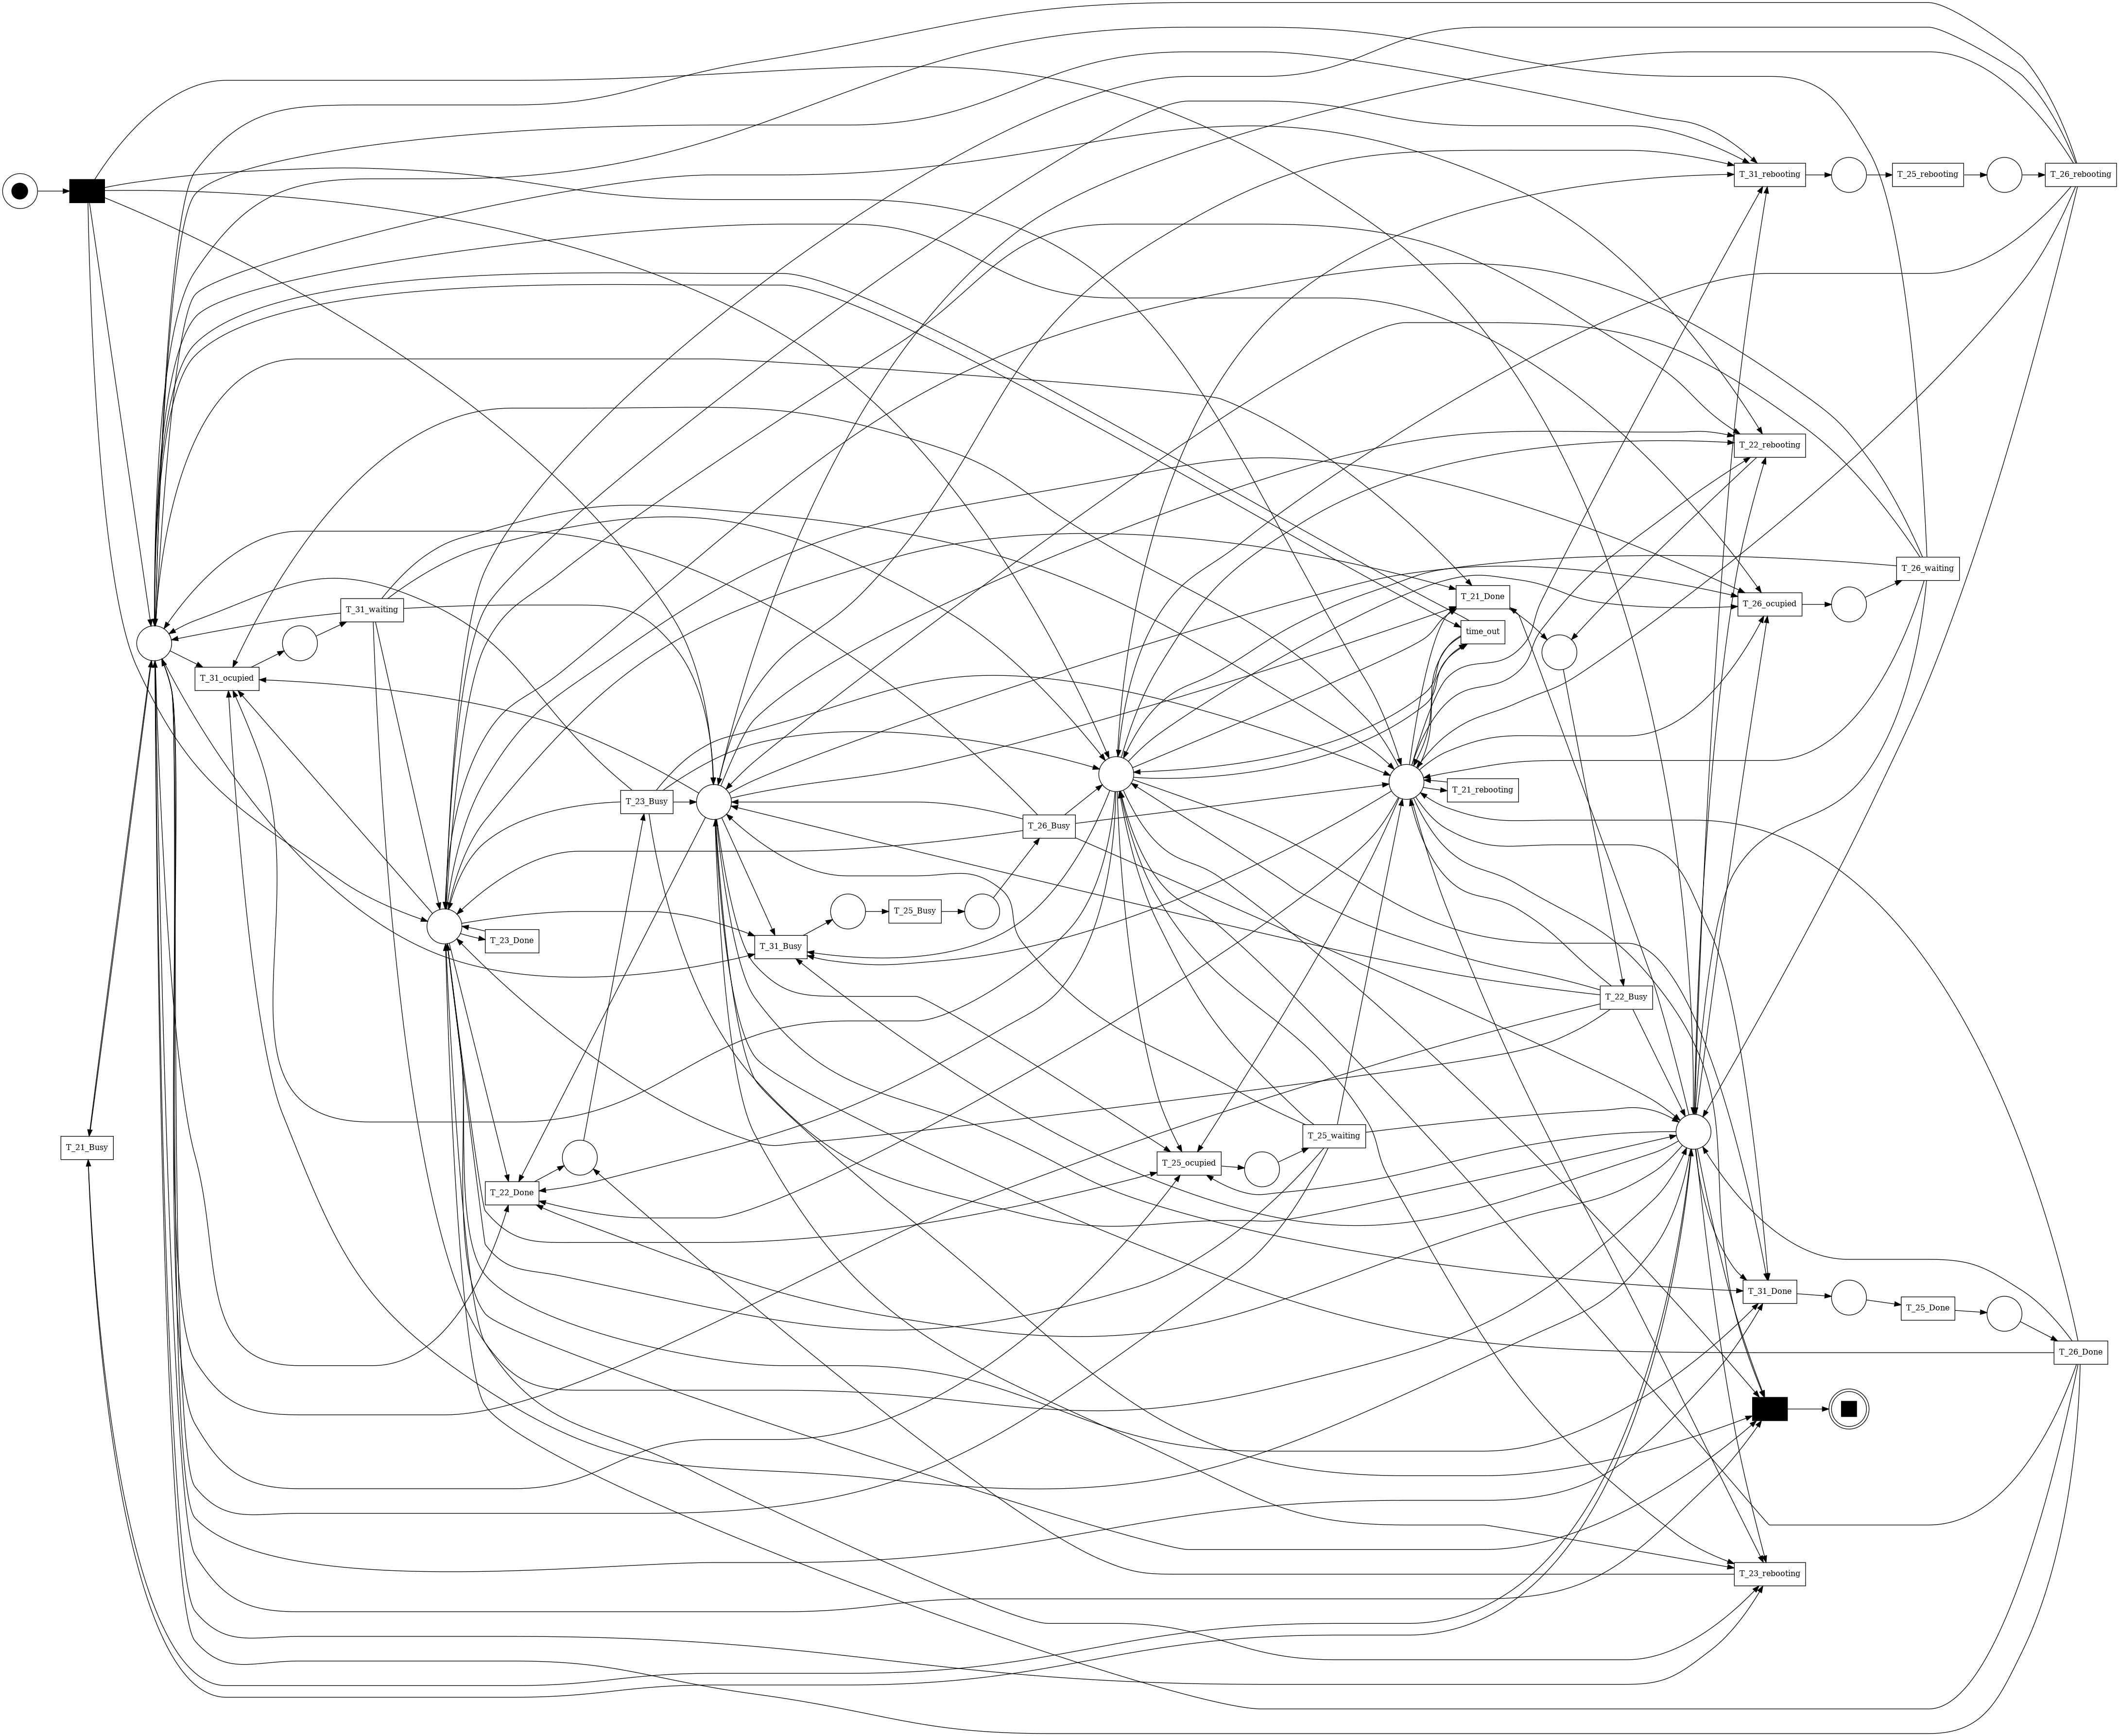

In [93]:
net_f, initial_marking_f, final_marking_f = pm4py.discovery.discover_petri_net_ilp(log_fail)
pm4py.view_petri_net(net_f, initial_marking_f, final_marking_f)


A great tool that allows us to check exactly activities that follow one another are directly follows diagrams, we have some bellow

In [94]:
dfg, start_activities, end_activities = pm4py.discover_dfg(log_fail)
#pm4py.view_dfg(dfg, start_activities, end_activities)

If you want to add performance (average time) to the dfg

In [95]:
performance_dfg, start_activities, end_activities = pm4py.discover_performance_dfg(log_fail)
#pm4py.view_performance_dfg(performance_dfg, start_activities, end_activities)

If the model is too complicated, but you want to analize it visually you can decompose it into smaller pieces, here you have the code

In [96]:

net_f, initial_marking_f, final_marking_f = pm4py.discover_petri_net_inductive(log_fail)
list_nets = decompose(net_f, initial_marking_f, final_marking_f)
for index, model in enumerate(list_nets):
    subnet, s_im, s_fm = model
    #pm4py.view_petri_net(subnet, s_im, s_fm)

Great!
All that you just did is contamplated in process mining as process discovery, hope it was fun, there are many many other tools you can use, check the pm4py website if you want to explore them further.

Now we will be doing Conformance Checking, here we will use our REAL LOG and our IDEAL MODEL, we will compare them and if there are anomalies as we expect, we'll try to detect them

Conformance Checking

Token-based replay

 Based on this comparison, token replay provides insights into whether the recorded process adheres to the expected process model. It can identify deviations, missing steps, or extra steps in the actual process.

In [97]:
import csv

# Create a list to store trace results
trace_results_list = []

replayed_traces = pm4py.conformance_diagnostics_token_based_replay(log_fail, net, initial_marking, final_marking)

# Iterate through the replayed traces and access conformance metrics for each trace
for i, trace_result in enumerate(replayed_traces, start=1):
    trace_is_fit = trace_result['trace_is_fit']  # Boolean indicating if the trace fits the model
    trace_fitness = trace_result['trace_fitness']  # Fitness value for the trace
    missing_tokens = trace_result['missing_tokens']  # Number of missing tokens
    consumed_tokens = trace_result['consumed_tokens']  # Number of consumed tokens
    remaining_tokens = trace_result['remaining_tokens']  # Number of remaining tokens
    produced_tokens = trace_result['produced_tokens']  # Number of produced tokens

    # Create a dictionary to store trace results
    trace_result_dict = {
        "Trace Number": i,
        "Trace Is Fit": trace_is_fit,
        "Trace Fitness": trace_fitness,
        "Missing Tokens": missing_tokens,
        "Consumed Tokens": consumed_tokens,
        "Remaining Tokens": remaining_tokens,
        "Produced Tokens": produced_tokens
    }

    # Append the trace result dictionary to the list
    trace_results_list.append(trace_result_dict)

    # Access other information as needed
    activated_transitions = trace_result['activated_transitions']
    reached_marking = trace_result['reached_marking']
    transitions_with_problems = trace_result['transitions_with_problems']
    enabled_transitions_in_marking = trace_result['enabled_transitions_in_marking']

# Define the path to the CSV file
csv_file_path = new_folder+"/trace_results.csv"

# Define the CSV fieldnames
fieldnames = ["Trace Number", "Trace Is Fit", "Trace Fitness", "Missing Tokens", "Consumed Tokens", "Remaining Tokens", "Produced Tokens"]

# Write the trace results to a CSV file with separators
with open(csv_file_path, mode='w', newline='') as csv_file:
    writer = csv.DictWriter(csv_file, fieldnames=fieldnames)
    
    # Write the header row
    writer.writeheader()
    
    for trace_result_dict in trace_results_list:
        # Write the trace results
        writer.writerow(trace_result_dict)
        
        # Write a separator row
        writer.writerow({key: '-' * 10 for key in fieldnames})

print(f"Trace results have been exported to {csv_file_path}")

replaying log with TBR, completed variants ::   0%|          | 0/47 [00:00<?, ?it/s]

Trace results have been exported to /home/jazmin/tuttifrutti/log/Tesis/example8/trace_results.csv


Diagnostics (TBR)


"The execution of token-based replay in pm4py permits to obtain detailed information about transitions that did not execute correctly, or activities that are in the log and not in the model. In particular, executions that do not match the model are expected to take longer throughput time."

In [98]:
from pm4py.algo.conformance.tokenreplay import algorithm as token_based_replay
net, initial_marking, final_marking = pm4py.discover_petri_net_inductive(log_inicial)
log_fail = log_converter.apply(events_fail)

parameters_tbr = {token_based_replay.Variants.TOKEN_REPLAY.value.Parameters.DISABLE_VARIANTS: True, token_based_replay.Variants.TOKEN_REPLAY.value.Parameters.ENABLE_PLTR_FITNESS: True}
replayed_traces, place_fitness, trans_fitness, unwanted_activities = token_based_replay.apply(log_fail, net,
                                                                                                initial_marking,
                                                                                                final_marking,
                                                                                                parameters=parameters_tbr)

print(trans_fitness)

csv_file_path = new_folder+"/trans_fitness.csv"

# Open the CSV file for writing and create a CSV writer
with open(csv_file_path, mode='w', newline='') as csv_file:
    fieldnames = ['Underfed_Traces', 'Fit_Traces']
    writer = csv.DictWriter(csv_file, fieldnames=fieldnames)

    # Write the header row to the CSV file
    writer.writeheader()

    # Iterate through the trans_fitness dictionary and write each entry to the CSV file
    for fitness_data in trans_fitness.values():
        writer.writerow({
            'Underfed_Traces': str(fitness_data['underfed_traces']),
            'Fit_Traces': str(fitness_data['fit_traces'])
        })

replaying log with TBR, completed variants ::   0%|          | 0/47 [00:00<?, ?it/s]

{(2b4a5b05-6680-48d7-b065-52b0ffb7d217, 'T_21_Busy'): {'underfed_traces': {}, 'fit_traces': {{'attributes': {}, 'events': [{'concept:name': 'T_21_Busy'}, '..', {'concept:name': 'time_out'}]}: [{'concept:name': 'time_out'}, {'concept:name': 'time_out'}, {'concept:name': 'time_out'}, {'concept:name': 'time_out'}, {'concept:name': 'time_out'}, {'concept:name': 'time_out'}, {'concept:name': 'time_out'}, {'concept:name': 'time_out'}, {'concept:name': 'time_out'}, {'concept:name': 'time_out'}], {'attributes': {}, 'events': [{'concept:name': 'T_21_Busy'}, '..', {'concept:name': 'time_out'}]}: [{'concept:name': 'time_out'}, {'concept:name': 'time_out'}, {'concept:name': 'time_out'}, {'concept:name': 'time_out'}, {'concept:name': 'time_out'}, {'concept:name': 'time_out'}, {'concept:name': 'time_out'}, {'concept:name': 'time_out'}, {'concept:name': 'time_out'}, {'concept:name': 'time_out'}, {'concept:name': 'time_out'}, {'concept:name': 'time_out'}, {'concept:name': 'time_out'}, {'concept:name':

Throughput analysis (unfit execution)

To perform throughput analysis on the transitions that were executed unfit, and then print on the console the result, the following code could be used:

Throughput analysis (activities)


To perform throughput analysis on the process executions containing activities that are not in the model, and then print the result on the screen, the following code could be used:

Alingments

In [99]:
aligned_traces = pm4py.conformance_diagnostics_alignments(log_fail, net, initial_marking, final_marking)
pm4py.fitness_alignments(log_fail, net, initial_marking, final_marking)
aligned_traces

/home/jazmin/.local/lib/python3.8/site-packages/pm4py/utils.py:494: UserWarning: the EventLog class has been deprecated and will be removed in a future release.
  warnings.warn("the EventLog class has been deprecated and will be removed in a future release.")


aligning log, completed variants ::   0%|          | 0/47 [00:00<?, ?it/s]

aligning log, completed variants ::   0%|          | 0/47 [00:00<?, ?it/s]

[{'alignment': [('>>', None),
   ('T_21_Busy', 'T_21_Busy'),
   ('T_21_rebooting', 'T_21_rebooting'),
   ('>>', None),
   ('>>', None),
   ('>>', None),
   ('time_out', 'time_out'),
   ('>>', None),
   ('time_out', 'time_out'),
   ('>>', None),
   ('time_out', 'time_out'),
   ('>>', None),
   ('time_out', 'time_out'),
   ('>>', None),
   ('>>', None)],
  'cost': 9,
  'visited_states': 21,
  'queued_states': 48,
  'traversed_arcs': 51,
  'lp_solved': 2,
  'fitness': 1.0,
  'bwc': 80007},
 {'alignment': [('>>', None),
   ('T_21_Busy', 'T_21_Busy'),
   ('T_21_rebooting', 'T_21_rebooting'),
   ('>>', None),
   ('T_21_Busy', 'T_21_Busy'),
   ('T_21_rebooting', 'T_21_rebooting'),
   ('>>', None),
   ('T_21_Busy', 'T_21_Busy'),
   ('T_21_rebooting', 'T_21_rebooting'),
   ('>>', None),
   ('T_21_Busy', 'T_21_Busy'),
   ('T_21_rebooting', 'T_21_rebooting'),
   ('>>', None),
   ('T_21_Busy', 'T_21_Busy'),
   ('T_21_rebooting', 'T_21_rebooting'),
   ('>>', None),
   ('T_21_Busy', 'T_21_Busy'),
  

In [100]:
import os

from pm4py import util
from pm4py.algo.conformance import alignments as ali
from pm4py.algo.conformance.alignments.petri_net.variants.state_equation_a_star import Parameters
from pm4py.objects import log as log_lib
from pm4py.objects.log.importer.xes import importer as xes_importer
from pm4py.objects.petri_net.importer import importer as petri_importer
from pm4py.objects.petri_net.utils.align_utils import pretty_print_alignments


def align(trace, net, im, fm, model_cost_function, sync_cost_function):
    trace_costs = list(map(lambda e: 1000, trace))
    params = dict()
    params[util.constants.PARAMETER_CONSTANT_ACTIVITY_KEY] = log_lib.util.xes.DEFAULT_NAME_KEY
    params[Parameters.PARAM_MODEL_COST_FUNCTION] = model_cost_function
    params[Parameters.PARAM_TRACE_COST_FUNCTION] = trace_costs
    params[Parameters.PARAM_SYNC_COST_FUNCTION] = sync_cost_function
    return ali.petri_net.algorithm.apply_trace(trace, net, im, fm, parameters=params,
                                   variant=ali.petri_net.algorithm.VERSION_STATE_EQUATION_A_STAR)


def execute_script():

    model_cost_function = dict()
    sync_cost_function = dict()
    for t in net.transitions:
        if t.label is not None:
            model_cost_function[t] = 1000
            sync_cost_function[t] = 0
        else:
            model_cost_function[t] = 1

    alignments = []
    for trace in log_fail:
        alignments.append(align(trace, net, initial_marking, final_marking, model_cost_function, sync_cost_function))

    pretty_print_alignments(alignments)


execute_script()

       >>       |   T_21_Busy    | T_21_rebooting |       >>       |       >>       |       >>       |    time_out    |       >>       |    time_out    |       >>       |    time_out    |       >>       |    time_out    |       >>       |       >>       |
---------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------
      None      |   T_21_Busy    | T_21_rebooting |      None      |      None      |      None      |    time_out    |      None      |    time_out    |      None      |    time_out    |      None      |    time_out    |      None      |      None      |


       >>       |   T_21_Busy    | T_21_rebooting |       >>       |   T_21_Busy    | T_21_rebooting |       >>       |   T_21_Busy    | T_21_rebooting |       >>       |   T_21_Busy    | T_21_rebooting |       >>       |   T_21_B

Throughput Time
Para mirar la duración de cada caso

In [101]:
all_case_durations = pm4py.get_all_case_durations(log_fail)
all_case_durations

[149.0,
 206.0,
 253.0,
 329.0,
 392.0,
 510.0,
 640.0,
 720.0,
 732.0,
 736.0,
 738.0,
 759.0,
 778.0,
 782.0,
 791.0,
 810.0,
 816.0,
 822.0,
 830.0,
 831.0,
 845.0,
 853.0,
 859.0,
 863.0,
 890.0,
 893.0,
 913.0,
 914.0,
 916.0,
 916.0,
 917.0,
 923.0,
 924.0,
 932.0,
 933.0,
 934.0,
 934.0,
 940.0,
 945.0,
 946.0,
 948.0,
 949.0,
 952.0,
 953.0,
 954.0,
 957.0,
 958.0,
 959.0,
 965.0,
 969.0]

Cycle Time and Waiting Time


In [102]:
from pm4py.objects.log.util import interval_lifecycle
enriched_log = interval_lifecycle.assign_lead_cycle_time(log_fail)
enriched_log


[{'attributes': {'concept:name': 'mision 0'}, 'events': [{'concept:name': 'T_21_Busy', 'resource': '10', 'org:resource': 50, 'start_timestamp': Timestamp('2023-09-16 17:21:34'), 'time:timestamp': Timestamp('2023-09-16 17:21:34'), '@@duration': 0.0, '@@approx_bh_partial_cycle_time': 0.0, '@@approx_bh_partial_lead_time': 0.0, '@@approx_bh_overall_wasted_time': 0, '@@approx_bh_this_wasted_time': 0, '@approx_bh_ratio_cycle_lead_time': 1}, '..', {'concept:name': 'time_out', 'resource': 'user', 'org:resource': 50, 'start_timestamp': Timestamp('2023-09-16 17:33:46'), 'time:timestamp': Timestamp('2023-09-16 17:33:46'), '@@duration': 0.0, '@@approx_bh_partial_cycle_time': 0.0, '@@approx_bh_partial_lead_time': 0.0, '@@approx_bh_overall_wasted_time': 0.0, '@@approx_bh_this_wasted_time': 0, '@approx_bh_ratio_cycle_lead_time': 1}]}, '....', {'attributes': {'concept:name': 'mision 49'}, 'events': [{'concept:name': 'T_21_Busy', 'resource': '16', 'org:resource': 50, 'start_timestamp': Timestamp('2023-

Eventualy follows graph are a useful tool too

In [103]:
efg_graph = pm4py.discover_eventually_follows_graph(log_fail)
efg_graph

{('T_21_Busy', 'T_21_rebooting'): 837,
 ('T_21_Busy', 'time_out'): 796,
 ('T_21_rebooting', 'time_out'): 668,
 ('time_out', 'time_out'): 240,
 ('T_21_Busy', 'T_21_Busy'): 759,
 ('T_21_rebooting', 'T_21_Busy'): 759,
 ('T_21_rebooting', 'T_21_rebooting'): 658,
 ('T_21_Busy', 'T_21_Done'): 126,
 ('T_21_Busy', 'T_22_Busy'): 159,
 ('T_21_Busy', 'T_22_rebooting'): 33,
 ('T_21_Busy', 'T_22_Done'): 116,
 ('T_21_Busy', 'T_23_Busy'): 159,
 ('T_21_Busy', 'T_23_Done'): 105,
 ('T_21_Busy', 'T_25_ocupied'): 160,
 ('T_21_Busy', 'T_25_waiting'): 160,
 ('T_21_Busy', 'T_26_ocupied'): 160,
 ('T_21_Busy', 'T_26_waiting'): 160,
 ('T_21_Busy', 'T_31_ocupied'): 159,
 ('T_21_Busy', 'T_31_waiting'): 159,
 ('T_21_Busy', 'T_31_Busy'): 99,
 ('T_21_Busy', 'T_25_Busy'): 99,
 ('T_21_Busy', 'T_26_Busy'): 99,
 ('T_21_Busy', 'T_31_rebooting'): 63,
 ('T_21_Busy', 'T_25_rebooting'): 63,
 ('T_21_Busy', 'T_26_rebooting'): 63,
 ('T_21_Busy', 'T_31_Done'): 22,
 ('T_21_Busy', 'T_25_Done'): 22,
 ('T_21_Busy', 'T_26_Done'): 22,

Distribución de la duración de un caso

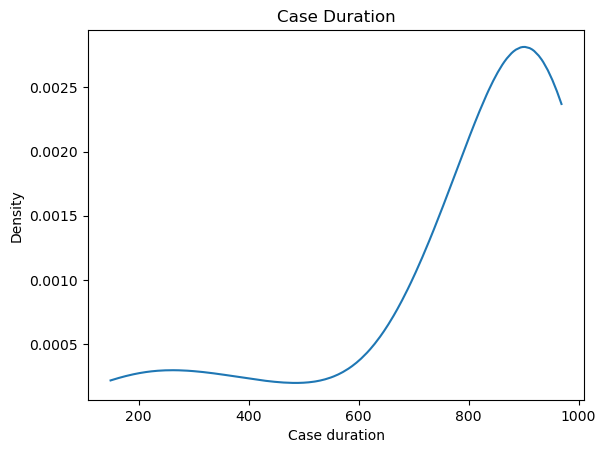

In [104]:

from pm4py.util import constants
from pm4py.statistics.traces.generic.log import case_statistics
x, y = case_statistics.get_kde_caseduration(log_fail, parameters={constants.PARAMETER_CONSTANT_TIMESTAMP_KEY: "time:timestamp"})

from pm4py.visualization.graphs import visualizer as graphs_visualizer

gviz = graphs_visualizer.apply_plot(x, y, variant=graphs_visualizer.Variants.CASES)
graphs_visualizer.view(gviz)

gviz = graphs_visualizer.apply_semilogx(x, y, variant=graphs_visualizer.Variants.CASES)
#graphs_visualizer.view(gviz)
                                    

Distribution of events over time

/usr/lib/python3/dist-packages/matplotlib/cbook/__init__.py:1402: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  ndim = x[:, None].ndim
/usr/lib/python3/dist-packages/matplotlib/axes/_base.py:276: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  x = x[:, np.newaxis]


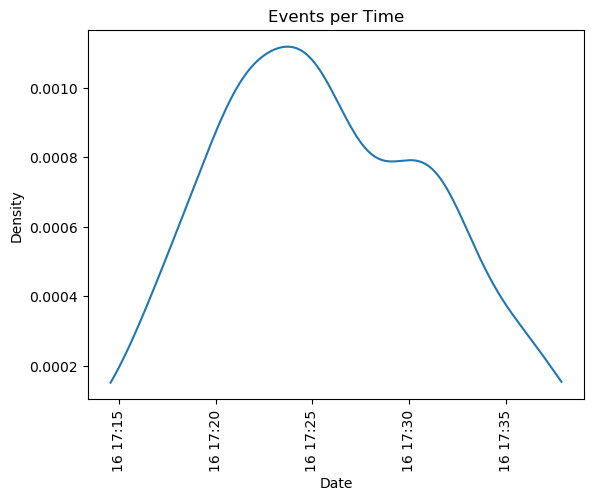

In [105]:
from pm4py.algo.filtering.log.attributes import attributes_filter


x, y = attributes_filter.get_kde_date_attribute(log_fail, attribute="time:timestamp")

from pm4py.visualization.graphs import visualizer as graphs_visualizer

gviz = graphs_visualizer.apply_plot(x, y, variant=graphs_visualizer.Variants.DATES)
graphs_visualizer.view(gviz)

Dotted Chart


In [106]:
#pm4py.view_dotted_chart(log_fail, format="png")
                                    

In [107]:
from pm4py.algo.discovery.batches import algorithm
batches = algorithm.apply(log_fail)
batches

[(('time_out', 50),
  1,
  {'Concurrent batching': [(1694885423.0,
     1694885873.0,
     {(1694885423.0, 1694885423.0, 'mision 25'),
      (1694885424.0, 1694885424.0, 'mision 25'),
      (1694885430.0, 1694885430.0, 'mision 49'),
      (1694885431.0, 1694885431.0, 'mision 49'),
      (1694885438.0, 1694885438.0, 'mision 41'),
      (1694885439.0, 1694885439.0, 'mision 41'),
      (1694885446.0, 1694885446.0, 'mision 44'),
      (1694885447.0, 1694885447.0, 'mision 44'),
      (1694885454.0, 1694885454.0, 'mision 30'),
      (1694885455.0, 1694885455.0, 'mision 30'),
      (1694885463.0, 1694885463.0, 'mision 29'),
      (1694885464.0, 1694885464.0, 'mision 29'),
      (1694885488.0, 1694885488.0, 'mision 45'),
      (1694885489.0, 1694885489.0, 'mision 45'),
      (1694885496.0, 1694885496.0, 'mision 8'),
      (1694885497.0, 1694885497.0, 'mision 8'),
      (1694885505.0, 1694885505.0, 'mision 42'),
      (1694885506.0, 1694885506.0, 'mision 42'),
      (1694885516.0, 1694885516.0,

Replay Fitness


In [108]:
net, marking, fmarking = pm4py.discover_petri_net_inductive(log_no_timeout)

fitness = pm4py.fitness_alignments(log_fail, net, marking, fmarking)


# Initialize an empty string to build the dictionary representation
fitness_str = ""

# Build the string with spaces and line breaks between each element
for key, value in fitness.items():
    fitness_str += f"{key}: {value}\n"




aligning log, completed variants ::   0%|          | 0/47 [00:00<?, ?it/s]

In [109]:
prec = pm4py.precision_alignments(log_fail, net, marking, fmarking)
prec = "precison: "+ str(prec)
prec

computing precision with alignments, completed variants ::   0%|          | 0/625 [00:00<?, ?it/s]

'precison: 0.6191536748329621'

In [110]:
from pm4py.algo.evaluation.generalization import algorithm as generalization_evaluator

gen = generalization_evaluator.apply(log_fail, net, marking, fmarking)
gen="generalization: " + str(gen)
gen


replaying log with TBR, completed variants ::   0%|          | 0/47 [00:00<?, ?it/s]

'generalization: 0.8241028280796345'

In [111]:
from pm4py.algo.evaluation.simplicity import algorithm as simplicity_evaluator
simp = simplicity_evaluator.apply(net)
simp= "simplicity: " + str(simp)
simp

'simplicity: 0.8'

In [112]:
# Save the string to a text file, overwriting the previous content
file_name = "/home/jazmin/tuttifrutti/log/Tesis/mision_variables/model_evaluation.txt"
with open(file_name, "w") as file:
    file.write(fitness_str)
    file.write(prec+"\n")
    file.write(gen+"\n")
    file.write(simp+"\n")


copy_file(file_name, new_folder)



File copied from /home/jazmin/tuttifrutti/log/Tesis/mision_variables/model_evaluation.txt to /home/jazmin/tuttifrutti/log/Tesis/example8
